In [ ]:
!pip install contractions
!pip install pyLDAvis
!pip install keybert
!pip install -U sentence-transformers
!pip install tweetnlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 7.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 13.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-p

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import contractions
import string
import spacy
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim_models
import math
from keybert import KeyBERT
import networkx as nx
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
import matplotlib.pyplot as plt
import wordcloud
import matplotlib.colors as mcolors
import tweetnlp
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
from itertools import product
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
names = spacy.load("en_core_web_sm")
propnames = tweetnlp.load_model('ner')

In [ ]:
makeSame = [["juventus", "juve"], ["barcelona", "barca"], ["manchester", "manchester city", "city"], ["potter", "graham", "graham potter"], ["boely", "todd", "todd boehly"], 
["bloom", "tony", "tony bloom"], ["trossard", "leandro trossard", "leandro"], ["mitoma", "kaoru", "kaoru mitoma"], ["guardiola", "pep", "pep guardiola"], ["webster", "adam webster"], ["gilmour", "billy", "billy gilmour"], ["ensico", "julio", "julio ensico"], 
["lallana", "adam lallana"], ["estupinan", "perwis", "perwis estupinan"], ["marsch", "solly", "solly marsch"], ["allister", "macallister", "mac allister", "alexis mac allister", "alexis macallister", "alexis"], ["gross", "pascal", "pascal gross"], 
["welbeck", "danny", "danny welbeck"], ["ferguson", "evan ferguson", "evan"], ["lamptey", "tariq", "tariq lamptey"], ["mwepu", "enock", "enock mwepu"], ["caicedo", "moises", "moises caicedo"], ["sarmiento", "jeremy", "jeremy sarmiento"],["tottenham", "spur", "spurs"]]
combined = [item for lis in makeSame for item in lis if item!= lis[0]]

In [ ]:
tweetsFile = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/labelled/ldaMSS.csv")
tweets = tweetsFile.Preprocessed.values.tolist()
for i in range(len(tweets)):
    tweets[i] = tweets[i].replace("de zerbi", "")
    tweets[i] = tweets[i].replace("dezerbi", "")
    tweets[i] = tweets[i].replace("zerbi", "")
    tweets[i] = tweets[i].replace(" de ", "")
    tweets[i] = tweets[i].replace("roberto", "")
    tweets[i] = tweets[i].replace("robert", "")
    tweets[i] = tweets[i].replace("francesco", "")
    tweets[i] = tweets[i].replace("rdz", "")
    tweets[i] = tweets[i].replace("brighton", "")
    tweets[i] = tweets[i].replace("bha", "")

In [ ]:
tweetsFile = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/labelled/ldaMSS.csv")
test = tweetsFile['Tweet'].values.tolist()
print(len(test))

1858


#Proper Nouns

In [ ]:
def makeNutriment(tweet):
    t = propnames.ner(tweet)
    propn_tweet = []
    for i in t:
        if i['type'] == 'person' or i['type'] == 'group':
            e = i['entity'].strip()
            en = e.lower()
            ent = " ".join(en.split())
            propn_tweet.append(ent)
    return propn_tweet
propn_allTweets = map(makeNutriment, tweets)
properN = []
for item in propn_allTweets:
    properN.append(item)
print(properN)

[['lam', 'lallana', 'welbeck', 'trossard', 'st', 'trossard', 'mitoma'], [], [], [], [], [], [], ['potter', 'chelsea'], [], ['liverpool'], ['liverpool', 'thiago', 'ajax', 'potter'], [], ['leandro', 'trossard'], [], [], ['liverpool'], [], ['sassuolo'], [], ['joel', 'veltman'], [], [], ['karen carney'], ['tottenham'], [], ['danny welbeck'], ['potter'], [], [], [], ['trent', 'konate', 'ramsay', 'henderson', 'elliott', 'jota'], [], [], [], [], ['liverpool'], ['pep', 'guardiola'], ['liverpool'], [], [], [], ['lukaku'], [], [], [], [], [], ['potter'], ['graham'], [], [], [], ['tottenham'], ['leandro trossard'], [], ['graham'], [], ['potter', 'pot'], ['danny', 'welbeck', 'welbeck'], [], [], ['steve cooper'], ['adam', 'lallana'], [], [], ['graham potter'], ['sh'], [], [], [], [], ['potter'], [], [], ['lallana', 'mitoma'], [], [], ['potter', 'chelsea', 'moyes', 'westham'], [], [], [], ['potter', 'brentford'], [], [], ['gab', 'juls', 'kylian', 'p', 'cann', 'dembele', 'magu', 'rooney'], ['danny', 

#Common Nouns

In [ ]:
nouns = []
for tweet in tweets:
  token_pos = []
  for token in names(tweet):
    if token.pos_ == 'NOUN':
      token_pos.append(token.text.lower())
  nouns.append(token_pos)

#**Nutriment** Setting

In [ ]:
def make_same(mlist):
    for j in range(len(mlist)):
        for i in range(len(mlist[j])):
            if mlist[j][i] in combined:
                for lis in makeSame:
                    if mlist[j][i] in lis:
                        mlist[j][i] = lis[0]
    return mlist

uniN = make_same(nouns)
uniP = make_same(properN)
print(len(uniN))
print(uniN)
print(len(uniP))
print(uniP)

1858
[['use', 'welbeck', 'trossard', 'trossard', 'lw', 'top'], ['ignore', 'impact', 'team', 'today', 'performance', 'potter', 'ball'], ['chelsea', 'potter', 'performance'], ['expert', 'perception', 'england', 'league', 'press', 'team', 'expose'], ['train', 'session', 'head', 'coach', 'pattern', 'man', 'offs', 'progression', 'line', 'pressure', 'lure', 'concept', 'superiority', 'credit'], ['manager', 'formation', 'player', 'building', 'tightens', 'pitch', 'control', 'game', 'thing', 'team', 'control', 'rhythm', 'game'], ['ball', 'possession', 'manchester', 'love', 'midfield', 'presence', 'ball', 'manchester', 'side'], ['race', 'season', 'adjustment', 'potter', 'show', 'press'], ['discredit', 'potter', 'disgrace', 'way', 'potter', 'drill', 'team', 'presence'], ['bypass', 'press', 'liverpool', 'bait', 'press', 'bypass', 'ball', 'centre', 'midfield', 'pivot', 'advance', 'midfielder'], ['liverpool', 'play', 'use', 'potter'], ['season', 'club', 'start', 'move', 'level'], ['trossard', 'host',

In [ ]:
propNSaver = []
for i in range(len(tweets)):
    for prop in uniP[i]:
        if prop not in uniN[i]:
            uniN[i].append(prop)
            if prop != "" and prop != " " and len(prop) > 2:
                propNSaver.append(prop)
        elif prop != "" and prop != " " and len(prop) > 2:
            propNSaver.append(prop)
    eachModifier = []
    for j in range(len(uniN[i])):
        if uniN[i][j] not in eachModifier and uniN[i][j] != "" and uniN[i][j] != " " and len(uniN[i][j]) > 2:
            eachModifier.append(uniN[i][j])
    uniN[i] = eachModifier
token_tweets = uniN
print(len(token_tweets))
print(token_tweets)

1858
[['use', 'welbeck', 'trossard', 'top', 'lam', 'lallana', 'mitoma'], ['ignore', 'impact', 'team', 'today', 'performance', 'potter', 'ball'], ['chelsea', 'potter', 'performance'], ['expert', 'perception', 'england', 'league', 'press', 'team', 'expose'], ['train', 'session', 'head', 'coach', 'pattern', 'man', 'offs', 'progression', 'line', 'pressure', 'lure', 'concept', 'superiority', 'credit'], ['manager', 'formation', 'player', 'building', 'tightens', 'pitch', 'control', 'game', 'thing', 'team', 'rhythm'], ['ball', 'possession', 'manchester', 'love', 'midfield', 'presence', 'side'], ['race', 'season', 'adjustment', 'potter', 'show', 'press', 'chelsea'], ['discredit', 'potter', 'disgrace', 'way', 'drill', 'team', 'presence'], ['bypass', 'press', 'liverpool', 'bait', 'ball', 'centre', 'midfield', 'pivot', 'advance', 'midfielder'], ['liverpool', 'play', 'use', 'potter', 'thiago', 'ajax'], ['season', 'club', 'start', 'move', 'level'], ['trossard', 'host', 'form', 'attack', 'return', 'm

In [ ]:
wholeUniques = [token for item in token_tweets for token in item]
copy = wholeUniques
wholeUniques = []
for item in copy:
    if item not in wholeUniques:
        wholeUniques.append(item)
freq = {}
for item in wholeUniques:
    freq[item] = 0
def makeDictionary(desiredlist):
    for tweet in desiredlist:
        for item in tweet:
            freq[item] += 1
    return dict(sorted(freq.items(), key=lambda x:x[1]))
correctTweets = []
propNSaver = list(dict.fromkeys(propNSaver))
for tweet in tweets:
    tweet = re.sub(" +", " ", tweet)
    tweet = tweet.split(" ")
    cTweet = []
    for item in tweet:
        if item in propNSaver:
            cTweet.append(item)
    correctTweets.append(cTweet)
tweets = correctTweets
for i in range(len(token_tweets)):
    for item in tweets[i]:
        if item not in token_tweets[i]:
            token_tweets[i].append(item)
tweets = token_tweets
nouns_propN_Dict = makeDictionary(tweets)
print(len(nouns_propN_Dict))
print(nouns_propN_Dict)
print(tweets)

2008
{'lam': 1, 'ignore': 1, 'perception': 1, 'expose': 1, 'offs': 1, 'lure': 1, 'tightens': 1, 'rhythm': 1, 'disgrace': 1, 'bettor': 1, 'tool': 1, 'examination': 1, 'dislike': 1, 'closure': 1, 'recieves': 1, 'bollock': 1, 'flaw': 1, 'innovation': 1, 'karen carney': 1, 'sustainability': 1, 'knack': 1, 'pause': 1, 'input': 1, 'assurance': 1, 'southgate': 1, 'konate': 1, 'glimpse': 1, 'ramsay': 1, 'henderson': 1, 'elliott': 1, 'stem': 1, 'insist': 1, 'laud': 1, 'extent': 1, 'counterpressing': 1, 'hazard': 1, 'lukaku': 1, 'aspect': 1, 'delight': 1, 'bridge': 1, 'fullback': 1, 'concentration': 1, 'framework': 1, 'loftus': 1, 'cheek': 1, 'hone': 1, 'abundance': 1, 'underperformance': 1, 'shade': 1, 'gem': 1, 'helm': 1, 'twist': 1, 'intrinsics': 1, 'element': 1, 'relegate': 1, 'cohesive': 1, 'steve cooper': 1, 'candidate': 1, 'positioning': 1, 'pragmatism': 1, 'transformation': 1, 'batter': 1, 'swap': 1, 'westham': 1, 'shuffle': 1, 'matteo': 1, 'underdogs': 1, 'switch': 1, 'naught': 1, 'cont

In [ ]:
nouns_propN_c1 = []
for k,v in nouns_propN_Dict.items():
    if v <= 3:
        nouns_propN_c1.append(k)

print(len(nouns_propN_c1))
print(nouns_propN_c1)

1513
['lam', 'ignore', 'perception', 'expose', 'offs', 'lure', 'tightens', 'rhythm', 'disgrace', 'bettor', 'tool', 'examination', 'dislike', 'closure', 'recieves', 'bollock', 'flaw', 'innovation', 'karen carney', 'sustainability', 'knack', 'pause', 'input', 'assurance', 'southgate', 'konate', 'glimpse', 'ramsay', 'henderson', 'elliott', 'stem', 'insist', 'laud', 'extent', 'counterpressing', 'hazard', 'lukaku', 'aspect', 'delight', 'bridge', 'fullback', 'concentration', 'framework', 'loftus', 'cheek', 'hone', 'abundance', 'underperformance', 'shade', 'gem', 'helm', 'twist', 'intrinsics', 'element', 'relegate', 'cohesive', 'steve cooper', 'candidate', 'positioning', 'pragmatism', 'transformation', 'batter', 'swap', 'westham', 'shuffle', 'matteo', 'underdogs', 'switch', 'naught', 'contes', 'gab', 'turmoil', 'cannavaro', 'rooney', 'juls', 'kylian', 'cann', 'dembele', 'magu', 'arm', 'bubble', 'heal', 'insult', 'ceiling', 'flyer', 'falmer', 'jon', 'know', 'oop', 'bohley', 'mids', 'gw10', 'st

In [ ]:
nouns_propN_e1 = []
for tweet in tweets:
    temp = [i for i in tweet if i not in nouns_propN_c1]
    nouns_propN_e1.append(temp)
print(len(nouns_propN_e1))
print(nouns_propN_e1)

1858
[['use', 'welbeck', 'trossard', 'top', 'lallana', 'mitoma', 'estupinan', 'lamptey'], ['impact', 'team', 'today', 'performance', 'potter', 'ball', 'tuchel'], ['chelsea', 'potter', 'performance'], ['expert', 'england', 'league', 'press', 'team', 'sassuolo'], ['train', 'session', 'head', 'coach', 'pattern', 'man', 'progression', 'line', 'pressure', 'superiority', 'credit', 'sassuolo'], ['manager', 'formation', 'player', 'pitch', 'control', 'game', 'thing', 'team'], ['ball', 'possession', 'manchester', 'love', 'midfield', 'presence', 'side'], ['season', 'potter', 'show', 'press', 'chelsea'], ['potter', 'way', 'team', 'presence'], ['bypass', 'press', 'liverpool', 'bait', 'ball', 'centre', 'midfield', 'pivot', 'midfielder'], ['liverpool', 'play', 'use', 'potter'], ['season', 'club', 'start', 'move', 'level'], ['trossard', 'host', 'form', 'attack', 'return', 'match', 'play', 'box', 'fpl', 'midfielders'], ['supporter', 'change', 'value', 'opportunity', 'premier', 'league', 'stats', 'tonig

In [ ]:
prepared_tweets = []
indexes = []
for i in range(len(nouns_propN_e1)):
    if len(nouns_propN_e1[i]) != 0:
        prepared_tweets.append(nouns_propN_e1[i])
        indexes.append(i)

print(len(prepared_tweets))

1706


In [ ]:
for item in wholeUniques:
    if freq[item] == 1 or freq[item] == 0 or freq[item] == 2 or freq[item] == 3:
        del freq[item] 
for item,value in freq.items():
    freq[item] = 0
prepared_tweets_Dict = makeDictionary(prepared_tweets)
words = []
freq = []
for k,v in prepared_tweets_Dict.items():
    words.append(k)
    freq.append(v)

df = pd.DataFrame({"words": words, "freq": freq})
# df.to_csv("/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/nutriments.csv", index=False) 

#LDA

In [ ]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(prepared_tweets)
print(id2word)

Dictionary<495 unique tokens: ['estupinan', 'lallana', 'lamptey', 'mitoma', 'top']...>


In [ ]:
def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus

corpus=create_document_matrix(prepared_tweets,id2word)
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(10, 1), (11, 1), (15, 1)], [(12, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(12, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)], [(8, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(11, 1), (15, 1), (19, 1), (45, 1), (46, 1)], [(11, 1), (12, 1), (43, 1), (47, 1)], [(8, 1), (19, 1), (41, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(6, 1), (11, 1), (51, 1), (54, 1)], [(45, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(5, 1), (54, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(18, 1), (34, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)], [(8, 1), (27, 1), (39, 1), (44, 1), (53, 1), (54, 1), (67, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(33, 1), (5

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                num_topics=num_topics,
                                                random_state=100,
                                                chunksize=200,
                                                alpha=1.5,
                                                passes=100,
                                                id2word=id2word)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=prepared_tweets,
                                                        limit=70,
                                                        start=10,
                                                        step=1)

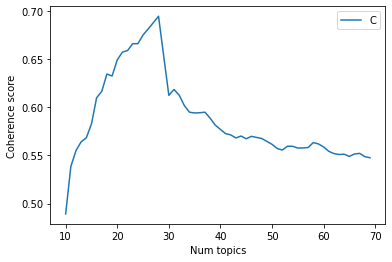

In [ ]:
limit = 70
start = 10
step = 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num topics")
plt.ylabel("Coherence score")
plt.legend(("Coherence_values"), loc="best")
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num topics = ", m, " has coherence value of ", round(cv, 4))

Num topics =  10  has coherence value of  0.4892
Num topics =  11  has coherence value of  0.5385
Num topics =  12  has coherence value of  0.555
Num topics =  13  has coherence value of  0.5641
Num topics =  14  has coherence value of  0.5682
Num topics =  15  has coherence value of  0.5827
Num topics =  16  has coherence value of  0.6099
Num topics =  17  has coherence value of  0.6166
Num topics =  18  has coherence value of  0.6346
Num topics =  19  has coherence value of  0.6325
Num topics =  20  has coherence value of  0.6493
Num topics =  21  has coherence value of  0.6573
Num topics =  22  has coherence value of  0.659
Num topics =  23  has coherence value of  0.666
Num topics =  24  has coherence value of  0.6661
Num topics =  25  has coherence value of  0.6751
Num topics =  26  has coherence value of  0.6814
Num topics =  27  has coherence value of  0.688
Num topics =  28  has coherence value of  0.6946
Num topics =  29  has coherence value of  0.6533
Num topics =  30  has co

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            num_topics=28,
                                            random_state=100,
                                            chunksize=200,
                                            alpha=1.5,
                                            passes=100,
                                            per_word_topics=True,
                                            id2word=id2word)

In [ ]:
def get_lda_topics(model, num_topics, top_n_words):
    word_dict = {}
    for i in range(num_topics):
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in model.show_topic(i, topn = top_n_words)];
    pd.DataFrame(word_dict).to_csv("/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/LDA_28.csv", index=False) 
    return pd.DataFrame(word_dict)
get_lda_topics(lda_model,28,10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 19,Topic # 20,Topic # 21,Topic # 22,Topic # 23,Topic # 24,Topic # 25,Topic # 26,Topic # 27,Topic # 28
0,ball,guardiola,league,time,manager,potter,change,season,man,work,...,club,way,coach,liverpool,press,game,potter,player,arsenal,chelsea
1,trossard,manchester,premier,football,lot,watch,match,potter,ball,thing,...,potter,week,today,tottenham,charge,appointment,squad,attack,day,job
2,albion,arteta,boss,point,tactic,approach,goal,chance,arrive,pot,...,bit,era,head,end,frank,bloom,tonight,system,year,shakhtar
3,pressure,estupinan,hag,podcast,problem,welbeck,people,thanks,mitoma,idea,...,cooper,quality,cook,difference,trust,video,result,place,move,praise
4,analysis,month,use,influence,philosophy,deal,option,thread,emery,line,...,record,credit,injury,haaland,howe,need,risk,transition,half,opposition
5,fixture,moyes,brentford,term,adam,defender,mind,class,formation,progress,...,show,mwepu,principle,pattern,lampard,lamptey,life,staff,respect,progression
6,rock,support,return,solution,comment,sense,list,lallana,talent,build,...,surprise,interview,sign,moment,rodgers,suit,guy,opponent,search,supporter
7,hat,test,combination,mistake,setup,summer,gilmour,yesterday,england,allister,...,target,pivot,control,amaze,vieira,recruitment,gon,preview,form,conference
8,model,thomas,contract,marco,experience,money,conference,train,veltman,touch,...,wolf,project,prediction,superiority,kick,force,wonder,boy,pas,seagull
9,trick,rate,disappoint,owner,centre,sack,seagull,see,eye,success,...,beat,erling,admire,area,confidence,strength,management,board,conference,antonio


In [ ]:
data = []
for tweet in prepared_tweets:
    temp = " ".join(tweet)
    data.append(temp)
print(data)

['use welbeck trossard top lallana mitoma estupinan lamptey', 'impact team today performance potter ball tuchel', 'chelsea potter performance', 'expert england league press team sassuolo', 'train session head coach pattern man progression line pressure superiority credit sassuolo', 'manager formation player pitch control game thing team', 'ball possession manchester love midfield presence side', 'season potter show press chelsea', 'potter way team presence', 'bypass press liverpool bait ball centre midfield pivot midfielder', 'liverpool play use potter', 'season club start move level', 'trossard host form attack return match play box fpl midfielders', 'supporter change value opportunity premier league stats tonight game', 'shape change block love attacker ball side play pressure pas pivot', 'tactic formation shaktar hope liverpool night', 'transition potter gon kind show coach job tuchel', 'flow football possession defence transition sassuolo', 'player coach staff work year style', 'po

In [ ]:
import pandas as pd
import gensim

dictionary = id2word

# Define a function to get the topic with the highest probability for a given tweet
def get_tweet_topic(tweet):
    # Get the topic distribution for the processed tweet
    topic_dist = lda_model.get_document_topics(tweet, minimum_probability=0.0)
    # Find the topic with the highest probability
    topic = max(topic_dist, key=lambda x: x[1])[0]
    return topic

# Apply the get_tweet_topic function to each tweet in the DataFrame
topics = []
for item in prepared_tweets:
    bow_vector = dictionary.doc2bow(item)
    topics.append(get_tweet_topic(bow_vector))
copy = test
test = []
for i in range(len(copy)):
    if i in indexes:
        test.append(copy[i])
df = pd.DataFrame({'Tweet': test, 'Topic': topics})
df.to_csv(f"/content/drive/MyDrive/Colab Notebooks/BSProject/datasets/topics.csv", index=False)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=15)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
25     0.253961  0.338344       1        1  3.725502
4      0.367989 -0.152299       2        1  3.701414
3     -0.364511 -0.058398       3        1  3.681484
9      0.002938  0.483572       4        1  3.673656
14     0.461320 -0.183446       5        1  3.668673
20     0.476371  0.026512       6        1  3.621873
23     0.174455  0.443599       7        1  3.619010
2     -0.419435 -0.251275       8        1  3.610745
5     -0.241015  0.239401       9        1  3.594737
12    -0.042261  0.304561      10        1  3.590017
11     0.370116  0.270506      11        1  3.580858
18    -0.134247  0.264581      12        1  3.578491
13    -0.339881  0.140623      13        1  3.575627
24    -0.210498  0.374324      14        1  3.573496
22    -0.018055 -0.480537      15        1  3.568209
1     -0.422837  0.275128      16        1  3.551210
7     -0.102068  0.094477      17        1  3.550865
21    -0.479729 -0.049049      18        1  3.550635
27     0.194573  0.120833      19        1  3.537650
17     0.389964  0.133175      20        1  3.520316
15     0.019870 -0.224338      21        1  3.519024
0      0.118622 -0.379515      22        1  3.510303
10     0.161264 -0.138238      23        1  3.501209
19    -0.150676 -0.404066      24        1  3.494947
6     -0.222473 -0.185136      25        1  3.487306
8      0.144934 -0.263387      26        1  3.475253
16     0.294603 -0.377213      27        1  3.470606
26    -0.283295 -0.362739      28        1  3.466886, topic_info=           Term       Freq       Total Category  logprob  loglift
8          ball  318.00000  318.000000  Default  15.0000  15.0000
11       potter  390.00000  390.000000  Default  14.0000  14.0000
12         team  168.00000  168.000000  Default  13.0000  13.0000
15      chelsea  142.00000  142.000000  Default  12.0000  12.0000
37       player  142.00000  142.000000  Default  11.0000  11.0000
..          ...        ...         ...      ...      ...      ...
438        hint    0.04459    1.211122  Topic28  -8.7045   0.0601
465       debut    0.04459    1.211122  Topic28  -8.7045   0.0601
461  conference    0.04459    1.211122  Topic28  -8.7045   0.0601
428     antonio    0.04459    1.211122  Topic28  -8.7045   0.0601
401     seagull    0.04459    1.211122  Topic28  -8.7045   0.0601

[519 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
277      21  0.795587     action
184       2  0.872628       adam
148       6  0.843913     admire
285      23  0.850886  advantage
168      22  0.968465     albion
...     ...       ...        ...
281      12  0.809797       wolf
247      14  0.900244     wonder
91        4  0.977400       work
92       28  0.974576       year
212      17  0.893345  yesterday

[328 rows x 3 columns], R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 5, 4, 10, 15, 21, 24, 3, 6, 13, 12, 19, 14, 25, 23, 2, 8, 22, 28, 18, 16, 1, 11, 20, 7, 9, 17, 27])